# Innføring til lineær regresjon

In [24]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.special import expit
from scipy.stats import expon
import math
! pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


## Introduksjon

La oss definere en lineær modell $Y = \beta_0 + \beta_1X + \epsilon$ med $\beta_0 = 2$ og $\beta_1$ = 3. La oss anta først at $\epsilon$ representer en tilfeldig, normalfordelt ($\mu = 0$), feil.

In [29]:
# Antall verdier av Y
npoints = 400
# Standardavviket vi bruker når vi trekker tilfeldige tall for feilen
sigma_e = 2

x = np.linspace(0, 2, npoints)
# Den sanne modellen (population regression line)
Y_pop_reg = 2 + 3*x

mean = np.zeros(npoints)
std = np.ones(npoints)*sigma_e

# Tilfeldige punkter
Y = 2 + 3*x + np.random.normal(mean,std)

La oss se hvordan de 400 punktene av $Y$ fordeler seg i forhold til den sanne modellen.

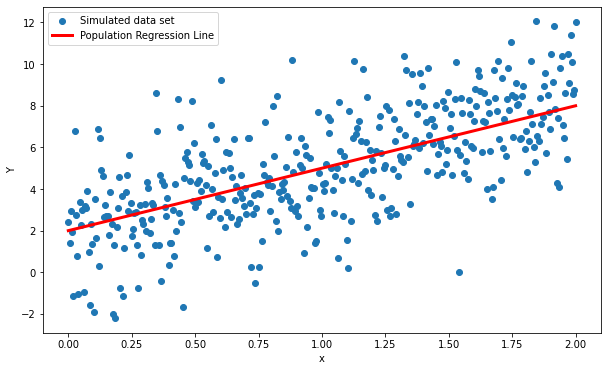

In [30]:
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.scatter(x,Y,label="Simulated data set")
plt.plot(x, Y_pop_reg, label="Population Regression Line", color="red", linewidth=3)
plt.xlabel("x")
plt.ylabel("Y")
plt.legend()

Så prøver vi oss på en lineær regresjon av punktene. Men først må vi manipulere input-vektorene litt.

Siden funksjonen vi vil bruke for å tilpasse en enkel lineær regresjons til dataene våre kun inneholder én predikator så må vi legge til en ekstra dimensjon for at funksjonen ikke klager. I praksis vil det si å konvertere en vektor til en matrise med èn ekstra dimensjon. Man kan enkelt sjekke dimensjonen til et numpy-array object i pyhon ved å kalle på *shape*, den gir deg eksakt dimensjonene av arrayen. Før vi legger til en dimensjon: 

In [31]:
x.shape

(400,)

In [32]:
x_lr = x[:, np.newaxis]
Y_lr = Y[:, np.newaxis]

... og etterpå

In [33]:
x_lr.shape

(400, 1)

In [34]:
clf = LinearRegression().fit(x_lr,Y_lr)

In [35]:
print("Coefficient = %.2f"%clf.coef_[0])
print("Intercept = %.10f"%clf.intercept_[0])
print("Score/R^2 = %.2f"%clf.score(x_lr,Y_lr))

Coefficient = 3.23
Intercept = 1.8487772932
Score/R^2 = 0.46


/tmp/ipykernel_2222527/4082072972.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Coefficient = %.2f"%clf.coef_[0])


La oss se hvordan tilpasningen passer med populasjonen

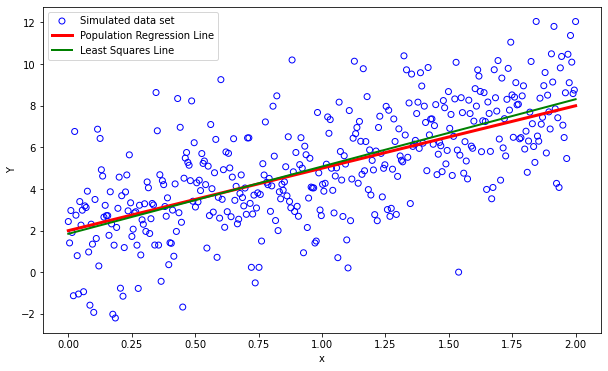

In [36]:
fit_lr = clf.intercept_[0] + clf.coef_[0]*x
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.scatter(x,Y,label="Simulated data set",facecolors='none', edgecolors='b')
plt.plot(x, Y_pop_reg, label="Population Regression Line", color="red", linewidth=3)
plt.plot(x, fit_lr, label="Least Squares Line", color="green", linewidth=2)
plt.xlabel("x")
plt.ylabel("Y")
plt.legend()

## Tilpasse flere modeller med tilfeldige feil

For å vise at dersom vi gjentar forsøket med å generere nye datatsett for den tilfeldige variabelen $Y$ kan vi observere:

1. at det er ingen bias i least square estimatene våre
2. sample mean er en god approksimasjon til den sanne populasjonen
3. $\sigma = \sqrt{\left(\frac{RSS}{n-1}\right)}$  er lik variansen i $Y$ gitt ved $Var(\epsilon)$

La oss se på 10000 tilfeldige utvalg av $Y$ hvor vi kan endre standardavviket til normalfordelingen vi trekker feilen fra.

In [42]:
import statsmodels.api as sm 
n = 10000
npoints = 400
beta0 = np.zeros(n)
beta1 = np.zeros(n)
muhat = np.zeros(n)
sigma = np.zeros(n)
rsquared = np.zeros(n)
fits = []
x = np.linspace(0, 2, npoints)
Y_pop_reg = 2 + 3*x

mean = np.zeros(npoints)
std = np.ones(npoints)*20

for i in range(n):
    Y = 2 + 3*x + np.random.normal(mean,std)
    x_lr = x[:, np.newaxis]
    Y_lr = Y[:, np.newaxis]
    
    x_lr_ac = sm.add_constant(x_lr)
    clf = sm.OLS(Y_lr,x_lr_ac).fit() 
    
    fit_lr = clf.params[0] + clf.params[1]*x
    
    sigma[i] = np.sqrt(clf.ssr/(len(x)-2))
    
    if i%(n/10) == 0:
        fits.append(fit_lr)
    
    beta0[i] = (clf.params[0])
    beta1[i] = (clf.params[1])
    muhat[i] = np.mean(fit_lr)
    rsquared[i] = clf.rsquared

Konverter en liste til numpy-array for plotting

In [43]:
fits_lr = np.asarray(fits, dtype=np.float32)

La oss plotte de ulike parameterne fra hver av tilpasningene til $Y$

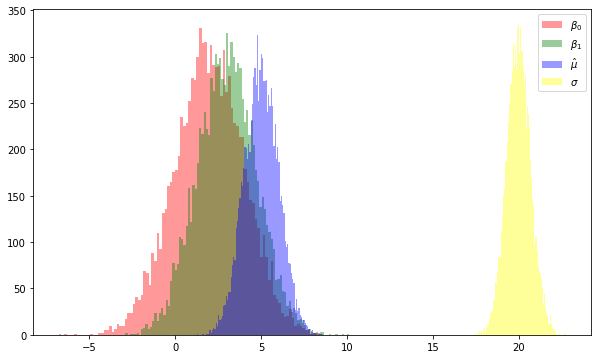

In [44]:
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.hist(beta0,bins=100, label=r'$\beta_0$', color="red", linewidth=3,alpha=.4);
plt.hist(beta1,bins=100, label=r'$\beta_1$', color="green", linewidth=3,alpha=.4);
plt.hist(muhat,bins=100, label=r'$\hat{\mu}$', color="blue", linewidth=3,alpha=.4);
plt.hist(sigma,bins=100, label=r'$\sigma$', color="yellow", linewidth=3,alpha=.4);
plt.legend()

Dette plottet er som forventet. De to parameterne, $\beta_0$ og $\beta_1$, er sentrert rundt den sanne verdien (2 og 3 hhv.). Vi vet at $\sigma^2 = Var(\epsilon)$. Siden vi trekker feilen $\epsilon$ for hvert eksperiment fra en normalfodeling med standardavvik 8 så samsvarer det godt med det vi observerer over.

Videre kan vi se på $\hat{\mu}$ som er vårt estimat av sample mean/population mean (vi antar at sample mean er en god approksimasjon til population mean). Dersom vi ser på kun et av "eksperimentene" så vil $\hat{\mu}$ over- eller underestimere $\mu$, men gjør vi nok eksperimenter så vil gjennomsnittlig $\hat{\mu}$ være eksakt lik $\mu$. Det er dette vi mener når vi sier at $\hat{\mu}$ ikke er en forutinntatthet (biased) estimator. Samme gjelder for least square koeffisientene, $\hat{\beta_0}$ og $\hat{\beta_1}$, som vi ser har en gjennomsnittlig verdi som sammenfaller godt med de sanne verdiene for $\beta_0$ og $\beta_1$. Dette blir klart om vi ser på et utvalg av de tilfeldige trekningene av $Y$

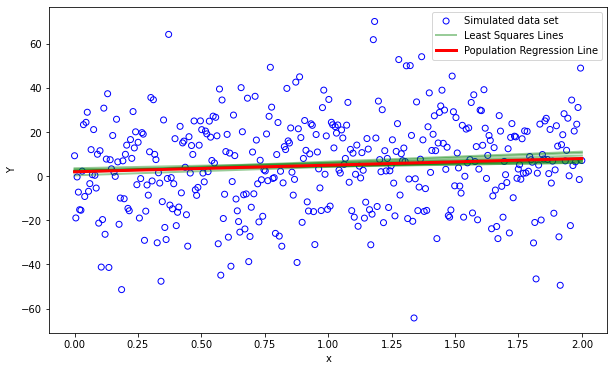

In [45]:
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.scatter(x,Y,label="Simulated data set",facecolors='none', edgecolors='b')
for i in range(len(fits_lr)-1):
    plt.plot(x, fits_lr[i], color="green", linewidth=2,alpha=0.4)
plt.plot(x, fits_lr[i], label="Least Squares Lines", color="green", linewidth=2,alpha=0.4)
plt.plot(x, Y_pop_reg, label="Population Regression Line", color="red", linewidth=3)
plt.xlabel("x")
plt.ylabel("Y")
plt.legend()

Videre kan vi regne ut standard feil på koeffisentene til least square tilpasningen vår gitt ved

$$SE(\hat{\beta_0})^2 = \sigma^2\left[\frac{1}{n} + \frac{\bar{x}^2}{\Sigma_{i=1}^{n}\left(x_i-\bar{x}\right)^{2}}\right]$$

og

$$SE(\hat\beta_1)^2 = \frac{\sigma^2}{\Sigma_{i=1}^{n}\left(x_i-\bar{x}\right)^2}$$

hvor $\bar{x}$ er sample mean. La oss regne de ut:

In [46]:
se_beta0 = np.sqrt((np.mean(sigma)*np.mean(sigma))*((1/npoints) + ((np.mean(x)*np.mean(x))/np.sum((x-np.mean(x))*(x-np.mean(x))))))
se_beta1 = np.sqrt((np.mean(sigma)*np.mean(sigma))/(np.sum((x-np.mean(x))*(x-np.mean(x)))))

print("Standard feil i beta_0 = %.3f"%se_beta0)
print("Standard feil i beta_1 = %.3f"%se_beta1)

Standard feil i beta_0 = 1.994
Standard feil i beta_1 = 1.726


### Spørsmål
1. Hva skjer med feilen på $\beta_1$ dersom vi øker spredningen i $x$?

1. Hva skjer med feilen på koeffisentene dersom vi øker antall "eksperimenter"?

Feilene på estimatet av $\beta_0$ og $\beta_1$ over gir oss følgende konfidensintervall:

In [47]:
print("Det er 95%% sjanse for at intervallet [%.2f, %.2f] inneholder den sanne verdien av beta0 (2)"%(np.mean(beta0)-2*se_beta0,np.mean(beta0)+2*se_beta0))
print("Det er 95%% sjanse for at intervallet [%.2f, %.2f] inneholder den sanne verdien av beta1 (3)"%(np.mean(beta1)-2*se_beta1,np.mean(beta1)+2*se_beta1))

Det er 95% sjanse for at intervallet [-2.00, 5.98] inneholder den sanne verdien av beta0 (2)
Det er 95% sjanse for at intervallet [-0.43, 6.47] inneholder den sanne verdien av beta1 (3)


## Hypotesetesting

Standardfeilen kan også brukes til å foreta hypotesetesting. La oss definere to hypoteser

$H_0$ : det er **ingen** sammenheng mellom $X$ og $Y$

$H_a$ : det er **noe** sammenheng mellom $X$ og $Y$

som i realiteten er et samme som å spørre om $\beta_1 = 0$ eller om $\beta_1 \neq 0$. Vi kan teste dette ved bruke t-statistikk gitt ved

$$t = \frac{\hat{\beta_1}-0}{SE(\hat{\beta}_1)}$$

Heldigvis har vi tilgang på t-statistikk metoder i statsmodels gjennom *stats.t()*

In [16]:
from scipy.stats import t
# La oss regne ut "vår" t fra standardfeilen
tval = np.mean(beta1)/se_beta1
# Lag en x-vektor (-10 til 10 skulle være mer enn nok)
xt = np.arange(-10,10,0.001)
print("t = %.3f"%tval)
# få tak i sannsynlighets tetthetsfunksjonen 
# til t-foredelingen (som er veldig lik 
# normalfordelingen ved antall frihetsgrader > 30)
tstat = t.pdf(xt,npoints-2)

t = 8.689


La oss ta en titt:

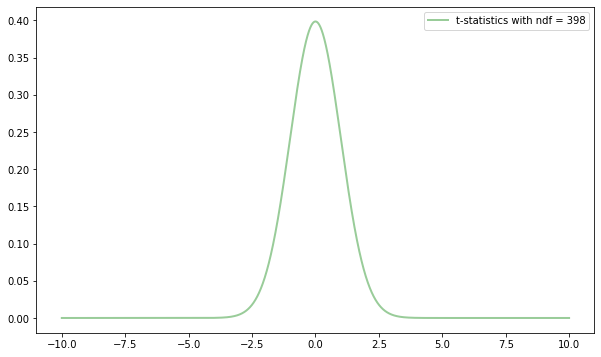

In [17]:
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.plot(xt, tstat, label="t-statistics with ndf = %i"%(npoints-2), color="green", linewidth=2, alpha=0.4)
plt.legend()

Det er til og med funksjoner til å regne ut konfidensintervall

In [18]:
t.interval(0.95,npoints-2)

(-1.9659423239761926, 1.9659423239761926)

Kjenner du igjen dette? (**hint:** $\approx 2$)

Vi kan deretter regne ut sannsynligheten for å observere en hvilken som helst t identisk til eller større enn $|t|$. Med andre ord; vi må regne ut integralet i halene (dvs. tval < t < -tval) til fordelingen over. Det kan vi gjøre ved å bruke "overlevelsesfunksjonen" (survival function) til sannsynlighetsfunksjonen over. Kan enkelt hentes i statsmodels gjennom *t.sf()*

In [19]:
tsurv = t.sf(xt, npoints-2)

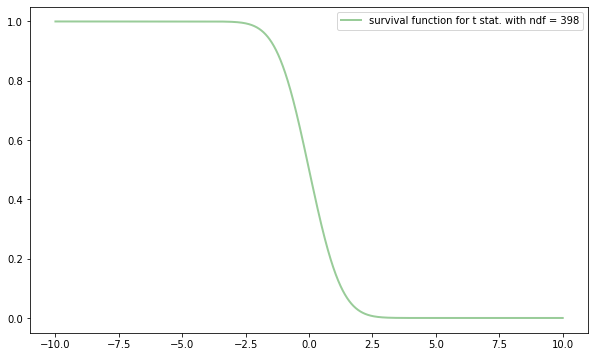

In [20]:
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.plot(xt, tsurv, label="survival function for t stat. with ndf = %i"%(npoints-2), color="green", linewidth=2, alpha=0.4)
plt.legend()

En enkel liten loop for å finne hvor vi skal starte integralet (som i realiteten er verdien til indeks x hvor vi krysser verdien for $t$ som vi fant over)

In [21]:
prob = 0.0
j = -1
for i in xt:
    j += 1
    if i > tval:
        cutval = j
        break

Og så finn p-verdien

In [22]:
tsurv[cutval]

4.8097916554844284e-17

## Ekstramateriale

Hvor bra er tilpasningen vår? La oss se på de $R^2$ for alle trekningene av $Y$. Hva skjer dersom vi endrer variansen i feilen?

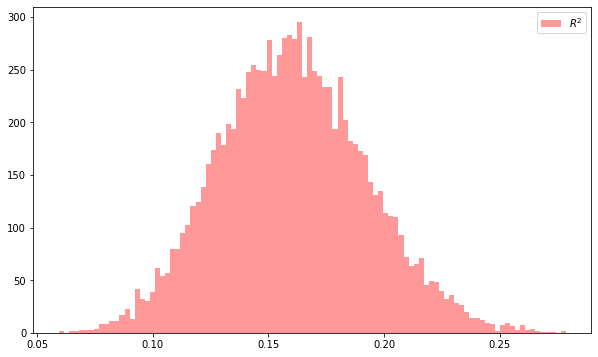

In [23]:
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.hist(rsquared,bins=100, label=r'$R^2$', color="red", linewidth=3,alpha=.4);
plt.legend()